In [4]:
import sys
import os
import logging

msg_format = "%(asctime)s|%(levelname)s|%(filename)s:%(lineno)d| %(message)s"
date_format = "%d-%b-%y %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=msg_format, datefmt=date_format, stream=sys.stdout)

pwd = os.getcwd()
module_path = f"{pwd}\..\src"
sys.path.insert(0, module_path)

from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

from hostelprices.scrape_web import ScrapeWeb

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
city_list = ['Lisbon', 'Seville']
date_from_list = [datetime(2023, 1, 5), datetime(2023, 4, 1)]
duration_list = [2, 5]
max_pages = 1

In [7]:
df_all = ScrapeWeb.loop(
    city_list=city_list, date_from_list=date_from_list, duration_list=duration_list, 
    max_pages=max_pages
    )

09-Dec-22 13:50:51|ERROR|scrape_web.py:158| Lisbon, 2023-01-05 00:00:00, 2
09-Dec-22 13:50:51|INFO|scrape_web.py:167| https://www.hostelworld.com/s?q=Lisbon,%20Portugal&country=Portugal&city=Lisbon&type=city&id=725&from=2023-1-5&to=2023-1-7&guests=1&page=1
09-Dec-22 13:50:51|INFO|logger.py:11| ====== WebDriver manager ======
09-Dec-22 13:50:53|INFO|logger.py:11| Get LATEST geckodriver version for 107.0 firefox
09-Dec-22 13:50:55|INFO|logger.py:11| Driver [C:\Users\fsgl1\.wdm\drivers\geckodriver\win64\0.32\geckodriver.exe] found in cache
09-Dec-22 13:51:13|ERROR|scrape_web.py:75| ['Free', 'Cancellation', 'Yes!', 'Lisbon', 'Hostel', '9.7', 'Superb', '(12547)Hostel-', '0.5km', 'from', 'city', 'centre', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'No', 'Privates', 'Available', 'Dorms', 'From', '€32']
09-Dec-22 13:51:13|ERROR|scrape_web.py:75| ['Free', 'Cancellation', 'Home', 'Lisbon', 'Hostel', '9.7', 'Superb', '(11354)Hostel-', '0.4km', 'from', 'city', 'centre', 'Follows', 'Covid-19'

[WDM] - Downloading: 19.0kB [00:00, 6.12MB/s]                   


09-Dec-22 13:51:19|INFO|logger.py:11| Driver [C:\Users\fsgl1\.wdm\drivers\geckodriver\win64\0.32\geckodriver.exe] found in cache
09-Dec-22 13:51:31|ERROR|scrape_web.py:75| ['1/', '30', 'Yes!', 'Lisbon', 'Hostel', 'Hostel', '-', '0.5km', 'from', 'city', 'centre', 'Show', 'on', 'Map', 'Free', 'WiFi', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Perfect', 'Location', 'Superb', 'Staff', 'Fantastic', 'Cleanliness', '9.7', 'Superb', '12547', 'Total', 'Reviews', '-5%', 'Free', 'Cancellation', 'No', 'Privates', 'Available', 'Dorms', 'From', '€32', '€30', 'View']
09-Dec-22 13:51:31|ERROR|scrape_web.py:75| ['1/', '29', 'Home', 'Lisbon', 'Hostel', 'Hostel', '-', '0.4km', 'from', 'city', 'centre', 'Show', 'on', 'Map', 'Free', 'WiFi', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Perfect', 'Location', 'Superb', 'Staff', 'Fantastic', 'Cleanliness', '9.7', 'Superb', '11354', 'Total', 'Reviews', 'Free', 'Cancellation', 'No', 'Privates', 'Available', 'Dorms', 'From', '€26', 'View']
09-Dec-22 1

[WDM] - Downloading: 19.0kB [00:00, 6.53MB/s]                   


09-Dec-22 13:51:35|INFO|logger.py:11| Driver [C:\Users\fsgl1\.wdm\drivers\geckodriver\win64\0.32\geckodriver.exe] found in cache
09-Dec-22 13:51:52|ERROR|scrape_web.py:75| ['1/', '30', 'Sant', 'Jordi', 'Hostels', 'Lisbon', 'Hostel', '-', '1.3km', 'from', 'city', 'centre', 'Show', 'on', 'Map', 'Free', 'WiFi', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Perfect', 'Location', 'Superb', 'Staff', 'Fantastic', 'Cleanliness', '9.3', 'Superb', '2414', 'Total', 'Reviews', '-10%', 'Free', 'Cancellation', 'Privates', 'From', '€88.88', '€80', 'Dorms', 'From', '€27.94', '€25', 'View']
09-Dec-22 13:51:52|ERROR|scrape_web.py:75| ['1/', '28', 'The', 'Independente', 'Hostel', '&', 'Suites', 'Hostel', '-', '0.5km', 'from', 'city', 'centre', 'Show', 'on', 'Map', 'Free', 'WiFi', 'Free', 'Breakfast', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Perfect', 'Location', 'Superb', 'Staff', 'Fantastic', 'Cleanliness', '9.2', 'Superb', '1869', 'Total', 'Reviews', '-12%', 'Free', 'Cancellation', 'Privat

[WDM] - Downloading: 19.0kB [00:00, 6.52MB/s]                   


09-Dec-22 13:51:57|INFO|logger.py:11| Driver [C:\Users\fsgl1\.wdm\drivers\geckodriver\win64\0.32\geckodriver.exe] found in cache
09-Dec-22 13:52:16|ERROR|scrape_web.py:75| ['Free', 'Cancellation', 'Sant', 'Jordi', 'Hostels', 'Lisbon', '9.3', 'Superb', '(2414)Hostel-', '1.3km', 'from', 'city', 'centre', 'Follows', 'Covid-19', 'sanitation', 'guidance', '-10%Privates', 'Dorms', 'From', '€26']
09-Dec-22 13:52:16|ERROR|scrape_web.py:75| ['Free', 'Cancellation', 'The', 'Independente', 'Hostel', '&', 'Suites', '9.2', 'Superb', '(1869)Hostel-', '0.5km', 'from', 'city', 'centre', 'Follows', 'Covid-19', 'sanitation', 'guidance', '-15%Privates', 'Dorms', 'From', '€22']
09-Dec-22 13:52:16|ERROR|scrape_web.py:75| ['Selling', 'out', 'fast!', 'Goodmorning', 'Solo', 'Traveller', 'Hostel', '9.7', 'Superb', '(5210)Hostel-', '0.3km', 'from', 'city', 'centre', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Privates', 'Dorms', 'From', '€35']
09-Dec-22 13:52:16|ERROR|scrape_web.py:75| ['Free', 'Cancellat

[WDM] - Downloading: 19.0kB [00:00, 9.75MB/s]                   


09-Dec-22 13:52:20|INFO|logger.py:11| Driver [C:\Users\fsgl1\.wdm\drivers\geckodriver\win64\0.32\geckodriver.exe] found in cache
09-Dec-22 13:52:35|ERROR|scrape_web.py:75| ['Selling', 'out', 'fast!', '1/', '24', 'Oasis', "Backpackers'", 'Palace', 'Sevilla', 'Hostel', '-', '1.3km', 'from', 'city', 'centre', 'Show', 'on', 'Map', 'Free', 'WiFi', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Perfect', 'Location', 'Superb', 'Staff', 'Fantastic', 'Cleanliness', '8.9', 'Fabulous', '6024', 'Total', 'Reviews', 'Free', 'Cancellation', 'Privates', 'From', '€146', 'Dorms', 'From', '€20', 'View']
09-Dec-22 13:52:35|ERROR|scrape_web.py:75| ['1/', '30', 'La', 'Banda', 'Rooftop', 'Hostel', 'Hostel', '-', '1.1km', 'from', 'city', 'centre', 'Show', 'on', 'Map', 'Free', 'WiFi', 'Free', 'Breakfast', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Perfect', 'Location', 'Superb', 'Staff', 'Fantastic', 'Cleanliness', '9.6', 'Superb', '4010', 'Total', 'Reviews', '-15%', 'Free', 'Cancellation', 'No', 'Pr

[WDM] - Downloading: 19.0kB [00:00, 20.4MB/s]                   


09-Dec-22 13:53:00|INFO|logger.py:11| Driver [C:\Users\fsgl1\.wdm\drivers\geckodriver\win64\0.32\geckodriver.exe] found in cache
09-Dec-22 13:53:20|ERROR|scrape_web.py:75| ['Selling', 'out', 'fast!', 'Free', 'Cancellation', 'Oasis', "Backpackers'", 'Palace', 'Sevilla', '8.9', 'Fabulous', '(6024)Hostel-', '1.3km', 'from', 'city', 'centre', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Privates', 'Dorms', 'From', '€32']
09-Dec-22 13:53:20|ERROR|scrape_web.py:75| ['For', 'You', 'Hostel', 'Sevilla', '9.1', 'Superb', '(879)Hostel-', '1.3km', 'from', 'city', 'centre', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Privates', 'Dorms', 'From', '€58']
09-Dec-22 13:53:20|ERROR|scrape_web.py:75| ['Selling', 'out', 'fast!', 'Free', 'Cancellation', 'Oasis', "Backpacker's", 'Hostel', 'Sevilla', '&', 'Coworking', '9.0', 'Superb', '(2034)Hostel-', '0.8km', 'from', 'city', 'centre', 'Privates', 'Dorms', 'From', '€31']
09-Dec-22 13:53:20|ERROR|scrape_web.py:75| ['Free', 'Cancellation', 'Hostel', 

[WDM] - Downloading: 19.0kB [00:00, 9.79MB/s]                   


09-Dec-22 13:53:25|INFO|logger.py:11| Driver [C:\Users\fsgl1\.wdm\drivers\geckodriver\win64\0.32\geckodriver.exe] found in cache
09-Dec-22 13:53:40|ERROR|scrape_web.py:75| ['Selling', 'out', 'fast!', '1/', '24', 'Oasis', "Backpackers'", 'Palace', 'Sevilla', 'Hostel', '-', '1.3km', 'from', 'city', 'centre', 'Show', 'on', 'Map', 'Free', 'WiFi', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Perfect', 'Location', 'Superb', 'Staff', 'Fantastic', 'Cleanliness', '8.9', 'Fabulous', '6024', 'Total', 'Reviews', 'Free', 'Cancellation', 'Privates', 'From', '€143', 'Dorms', 'From', '€32', 'View']
09-Dec-22 13:53:40|ERROR|scrape_web.py:75| ['1/', '30', 'For', 'You', 'Hostel', 'Sevilla', 'Hostel', '-', '1.3km', 'from', 'city', 'centre', 'Show', 'on', 'Map', 'Free', 'WiFi', 'Follows', 'Covid-19', 'sanitation', 'guidance', 'Perfect', 'Location', 'Superb', 'Staff', 'Fantastic', 'Cleanliness', '9.1', 'Superb', '879', 'Total', 'Reviews', 'Privates', 'From', '€258', 'Dorms', 'From', '€58', 'View']
09-D

In [8]:
len(df_all)
df_all = df_all[(df_all["price (EUR)"]<100) & (df_all["duration (days)"]==2)]
df_all.head()

,price (EUR),rating,distance (km),city,date_from,duration (days),request_time
3,32.0,9.7,0.5,Lisbon,2023-01-05,2,2022-12-09 13:51:13.897398
4,27.0,9.7,0.4,Lisbon,2023-01-05,2,2022-12-09 13:51:13.897398
5,21.0,9.3,1.3,Lisbon,2023-01-05,2,2022-12-09 13:51:13.897398
6,22.0,9.2,0.5,Lisbon,2023-01-05,2,2022-12-09 13:51:13.897398
7,26.0,9.7,0.3,Lisbon,2023-01-05,2,2022-12-09 13:51:13.897398


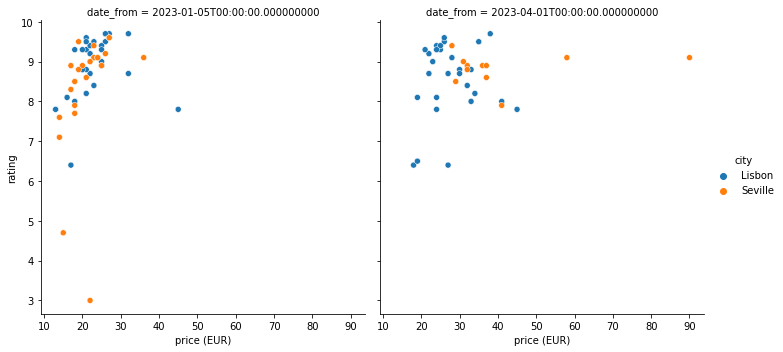

In [9]:
sns.relplot(
    data=df_all,    
    x='price (EUR)',
    y='rating',
    col='date_from',
    hue='city'
    )
plt.show()